In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
! unzip '/content/drive/MyDrive/data_split.zip'


unzip:  cannot find or open /content/drive/MyDrive/data_split.zip, /content/drive/MyDrive/data_split.zip.zip or /content/drive/MyDrive/data_split.zip.ZIP.


Removing tags and colons in all data in the train-data file. (Got this code from Goose) and output what it looks like after removing them in the table below.


In [ ]:
#Removing tags in reports text file: CC:, <B>,
TextList = [] #(filename, label, text)
path = '/content/dataset/train-data'
import re
for label in os.listdir(path):
    for filename in os.listdir(path+'/'+label):
        file = path+'/'+label+'/'+filename
        try:
            with open(file, 'r') as f:
                text = f.readlines()
                parsetext = [] # list containing sentences
                for sentence in text:
                    if sentence == '\n':
                        pass
                    else:
                        for badcharacter in ['<B>\w{2}:', 'CC:', '<B>', '</B>', '\n',':','&quot;']:
                            sentence = re.sub(badcharacter, '', sentence)
                        sentence = ''.join([s.lower() for s in sentence])
                        
                        parsetext.append(sentence)

            TextList.append((filename.strip('.txt'), label.strip(path), ''.join(parsetext)))
        except:
            pass

data = pd.DataFrame(TextList, columns = ['filename', 'label', 'text'])  



In [ ]:
data.head()

,filename,label,text
0,1009,Urology,procedure elective male sterilization via bil...
1,1177,Urology,physical examination the patient is a 63-year...
2,1797,Urology,preoperative diagnosis bilateral vesicoureter...
3,1744,Urology,preoperative diagnosis penoscrotal abscess.po...
4,1290,Urology,preoperative diagnosis prostate cancer.postop...


Visualize number of reports in each domains

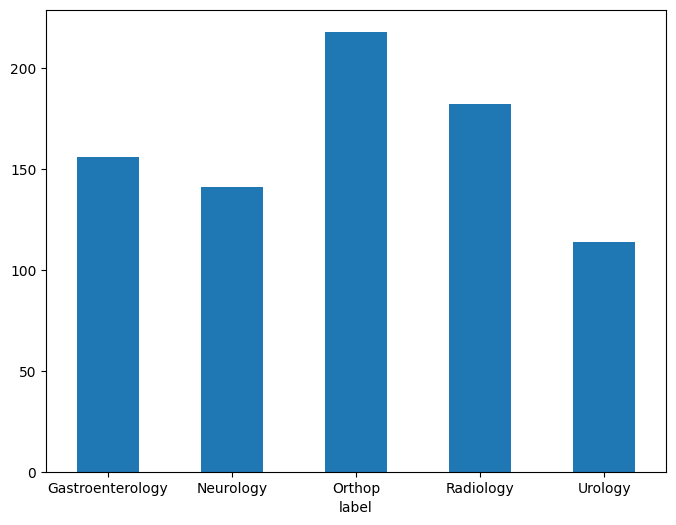

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,6))
data.groupby('label').text.count().plot.bar(ylim=0)
plt.xticks(rotation=0)
plt.show()

# New Section

# New Section

In [ ]:
data.isnull().sum()

filename    0
label       0
text        0
dtype: int64

I will locate one sample text file from the file for comparison purposes. The sample belongs to **row 1** from above table, if you can see it. This sample have **3085 characters**. If you wanted to see it for yourself, hover your cursor at the end of the text.

In [ ]:

data.text.iloc[1]

"physical examination  the patient is a 63-year-old executive who was seen by his physician for a company physical.  he stated that he was in excellent health and led an active life.  his physical examination was normal for a man of his age.  chest x-ray and chemical screening blood work were within normal limits.  his psa was elevated.imagingchest x-ray  normal.ct scan of abdomen and pelvis  no abnormalities.laboratory  psa 14.6.procedures  ultrasound guided sextant biopsy of prostate  digital rectal exam performed at the time of the biopsy showed a 1+ enlarged prostate with normal seminal vesicles.pathology  prostate biopsy  left apex  adenocarcinoma, moderately differentiated, gleason's score 3 + 4 = 7/10.  maximum linear extent in apex of tumor was 6 mm.  left mid region prostate  moderately differentiated adenocarcinoma, gleason's 3 + 2 = 5/10.  left base, right apex, and right mid-region and right base  negative for carcinoma.treatment  the patient opted for low dose rate interst

This next step, we will began to calculate the most 20 common words. The cell below attempts to store all the words in the '**text**' column in **wordList**. I'm outputting the result of wordList also. Got this code from the project you sent.

In [ ]:
wordList = list()
for i in range(len(data)):
    temp = data.text[i].split()
    for k in temp:
        
        if k != "":
            wordList.append(k)

In [ ]:
wordList

['procedure',
 'elective',
 'male',
 'sterilization',
 'via',
 'bilateral',
 'vasectomy.preoperative',
 'diagnosis',
 'fertile',
 'male',
 'with',
 'completed',
 'family.postoperative',
 'diagnosis',
 'fertile',
 'male',
 'with',
 'completed',
 'family.medications',
 'anesthesia',
 'is',
 'local',
 'with',
 'conscious',
 'sedation.complications',
 'none.blood',
 'loss',
 'minimal.indications',
 'this',
 '34-year-old',
 'gentleman',
 'has',
 'come',
 'to',
 'the',
 'office',
 'requesting',
 'sterilization',
 'via',
 'bilateral',
 'vasectomy.',
 'i',
 'discussed',
 'the',
 'indications',
 'and',
 'the',
 'need',
 'for',
 'procedure',
 'with',
 'the',
 'patient',
 'in',
 'detail,',
 'and',
 'he',
 'has',
 'given',
 'consent',
 'to',
 'proceed.',
 'he',
 'has',
 'been',
 'given',
 'prophylactic',
 'antibiotics.procedure',
 'note',
 'once',
 'satisfactory',
 'sedation',
 'have',
 'been',
 'obtained,',
 'the',
 'patient',
 'was',
 'placed',
 'in',
 'the',
 'supine',
 'position',
 'on',
 'the

In this step, I followed a code in the project you sent me. I set a counter for wordList and make them rank in ascending order on which word is being used the most. We will store those 20 words in **df** list.

In [ ]:
from collections import Counter

wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
df = []
count = []
print("Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))
    df.append(word)
    count.append(counted)

Most Used 20 Words
the : 24027
and : 13136
was : 11246
of : 9654
to : 7789
a : 6298
with : 5578
in : 5032
is : 3760
patient : 2947
were : 2623
no : 2481
on : 2473
for : 2447
she : 2334
he : 2249
at : 2118
this : 2065
then : 1979
right : 1823


([<matplotlib.patches.Wedge at 0x7f575d1d0f70>,
 [Text(0.8597385053793712, 0.68618488934692, 'the'),
  Text(-0.15858844103515093, 1.0885080185143519, 'and'),
  Text(-0.8104084314523353, 0.7437998213437307, 'was'),
  Text(-1.0865340142367166, 0.17159206248147607, 'of'),
  Text(-1.0397935152555884, -0.35892819007766236, 'to'),
  Text(-0.8216575332240703, -0.7313541536739475, 'a'),
  Text(-0.5375079348583233, -0.9597318479473006, 'with'),
  Text(-0.23261976090199415, -1.075122340404988, 'in'),
  Text(0.036737440784189036, -1.099386356311842, 'is'),
  Text(0.2415935880897031, -1.0731414343850223, 'patient'),
  Text(0.4055510947130605, -1.0225107870223367, 'were'),
  Text(0.5472201138254713, -0.9542275132403374, 'no'),
  Text(0.6740542123234512, -0.8692818408600356, 'on'),
  Text(0.7871750828955713, -0.7683458784091647, 'for'),
  Text(0.882792608966507, -0.6562600167266842, 'she'),
  Text(0.9596037369669318, -0.5377366158251639, 'he'),
  Text(1.0180914857221695, -0.4165209799038047, 'at'),


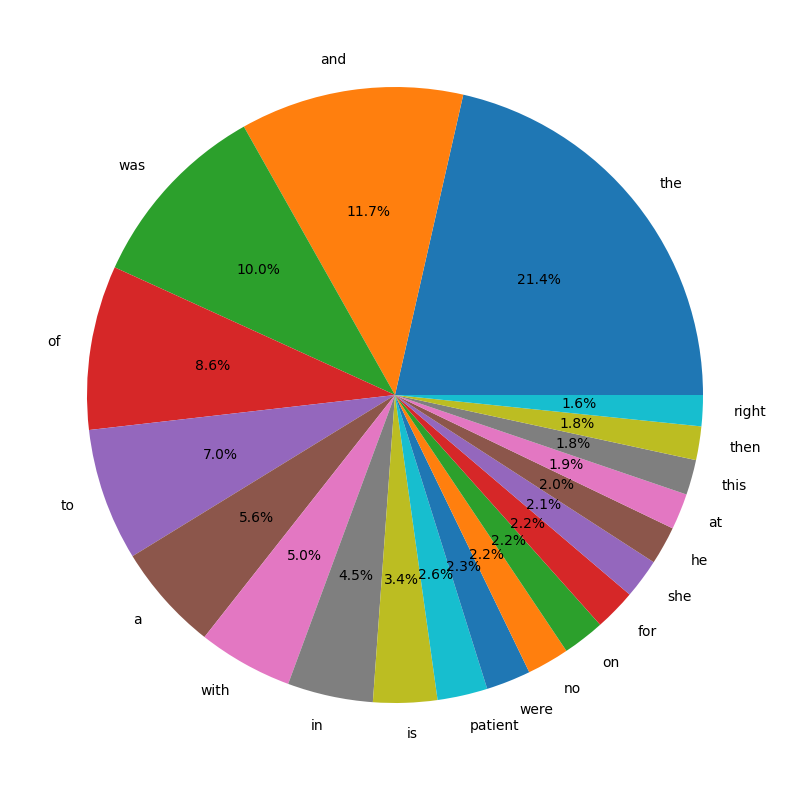

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.pie(count, labels = df, autopct='%.1f%%')

Visualize number of most occuring words. (top 20)

<BarContainer object of 20 artists>

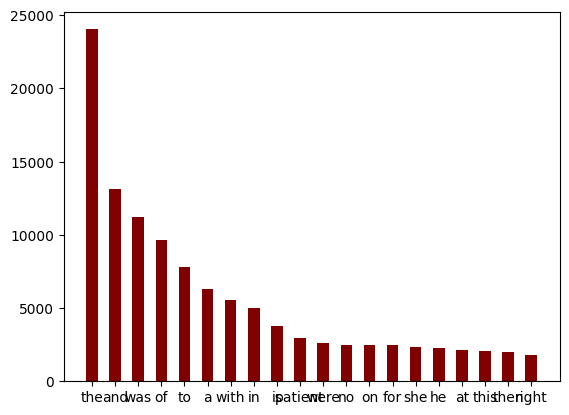

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df, count, color ='maroon',
        width = 0.5)

Now that I got 20 words that were used the most and stored it in the df. Let see what df looks like. It is basically list of words above.

In [ ]:
df

['the',
 'and',
 'was',
 'of',
 'to',
 'a',
 'with',
 'in',
 'is',
 'patient',
 'were',
 'no',
 'on',
 'for',
 'she',
 'he',
 'at',
 'this',
 'then',
 'right']

Feel free to ignore some of these libraries. The ones you should be focus on are **my_stop_words**. In that line, is saying that my stop words a basic english words(that python have in their library for us) and UNION with **df** list above. You can see the result anyway when I ran my_stop_words cell below.

In [ ]:
#import libraries and store stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
filtered_sentence = []

my_stop_words = text.ENGLISH_STOP_WORDS.union(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In this step, I got the code online(geeks for geeks) for removing stopwords and store the result back to the column name **text**. 

In [ ]:
#remove all the listed stopwords from dataframe
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (my_stop_words)]))

I grab the same sample as above. You can see that the paragraph decreased from having originally **3085** characters to **2471** characters.

In [ ]:
data.text.iloc[1]

"physical examination 63-year-old executive seen physician company physical. stated excellent health led active life. physical examination normal man age. chest x-ray chemical screening blood work normal limits. psa elevated.imagingchest x-ray normal.ct scan abdomen pelvis abnormalities.laboratory psa 14.6.procedures ultrasound guided sextant biopsy prostate digital rectal exam performed time biopsy showed 1+ enlarged prostate normal seminal vesicles.pathology prostate biopsy left apex adenocarcinoma, moderately differentiated, gleason's score 3 + 4 = 7/10. maximum linear extent apex tumor 6 mm. left mid region prostate moderately differentiated adenocarcinoma, gleason's 3 + 2 = 5/10. left base, apex, mid-region base negative carcinoma.treatment opted low dose rate interstitial prostatic implants i-125. performed outpatient 8/10."

In [ ]:
data['label_id'] = data['label'].factorize()[0]
specialty_id_df = data[['label', 'label_id']].drop_duplicates().sort_values('label_id')
specialty_to_id = dict(specialty_id_df.values)

In [ ]:

tfidf = TfidfVectorizer(stop_words=list(my_stop_words))
features = tfidf.fit_transform(data.text).toarray()
labels = data.label_id
features.shape
labels.shape

(811,)

In [ ]:
from sklearn.feature_selection import chi2

N = 2 # ‘N’ variable represents the number of most correlated unigrams and bigrams to be printed for each label

for label,label_id in sorted(specialty_to_id.items()):
    # labels == label_id creates a boolean mask where True indicates the
    #        positions where the labels match the current label_id
    features_chi2 = chi2(features, labels == label_id)
    
    indices = np.argsort(features_chi2[0]) # storing features based on Chi-square test score
    
    # the feature names corresponding to the sorted indices
    feature_names = np.array(tfidf.get_feature_names_out())[indices] 
    
    # Filtering Unigrams (single words) features
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]

    # Filtering bigrams features
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(label))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

# 'Gastroenterology':
  . Most correlated unigrams:
. stomach
. colon
  * Most Correlated Bigrams are: 
# 'Neurology':
  . Most correlated unigrams:
. recording
. temporal
  * Most Correlated Bigrams are: 
# 'Orthop':
  . Most correlated unigrams:
. tourniquet
. knee
  * Most Correlated Bigrams are: 
# 'Radiology':
  . Most correlated unigrams:
. fraction
. perfusion
  * Most Correlated Bigrams are: 
# 'Urology':
  . Most correlated unigrams:
. inguinal
. prostate
  * Most Correlated Bigrams are: 


In [ ]:
x = data.text
y = data.label

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=0)

nb = Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
from sklearn.metrics import classification_report
y_predNB = nb.predict(X_test)


print(classification_report(y_test, y_predNB))

                  precision    recall  f1-score   support

Gastroenterology       1.00      0.69      0.82        42
       Neurology       0.59      0.34      0.43        29
          Orthop       0.48      0.92      0.63        36
       Radiology       0.50      0.64      0.56        33
         Urology       1.00      0.26      0.41        23

        accuracy                           0.61       163
       macro avg       0.71      0.57      0.57       163
    weighted avg       0.71      0.61      0.60       163



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predNB)

array([[29,  0,  7,  6,  0],
       [ 0, 10,  7, 12,  0],
       [ 0,  1, 33,  2,  0],
       [ 0,  6,  6, 21,  0],
       [ 0,  0, 16,  1,  6]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=0)

ls = Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', LinearSVC()),
              ])
ls.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
y_predls = ls.predict(X_test)
print(metrics.classification_report(y_test, y_predls))

                  precision    recall  f1-score   support

Gastroenterology       0.97      0.83      0.90        42
       Neurology       0.53      0.34      0.42        29
          Orthop       0.94      0.89      0.91        36
       Radiology       0.46      0.70      0.55        33
         Urology       0.88      0.91      0.89        23

        accuracy                           0.74       163
       macro avg       0.75      0.74      0.74       163
    weighted avg       0.77      0.74      0.75       163



In [ ]:
confusion_matrix(y_test, y_predls)

array([[35,  0,  0,  6,  1],
       [ 0, 10,  1, 17,  1],
       [ 0,  1, 32,  3,  0],
       [ 0,  8,  1, 23,  1],
       [ 1,  0,  0,  1, 21]])

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', LogisticRegression()),
              ])
lg.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [ ]:
y_pred = lg.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Gastroenterology       1.00      0.81      0.89        42
       Neurology       0.62      0.45      0.52        29
          Orthop       0.84      0.89      0.86        36
       Radiology       0.49      0.70      0.57        33
         Urology       0.87      0.87      0.87        23

        accuracy                           0.75       163
       macro avg       0.76      0.74      0.74       163
    weighted avg       0.78      0.75      0.75       163



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

# import seaborn as sns

# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# plt.title("Linear SVC Confusion Matrix", size = 15)

array([[34,  0,  0,  7,  1],
       [ 0, 13,  2, 13,  1],
       [ 0,  1, 32,  3,  0],
       [ 0,  6,  3, 23,  1],
       [ 0,  1,  1,  1, 20]])